## モデルチェック

In [1]:
# need library
import glob
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
%matplotlib inline


import tensorflow as tf
config = tf.ConfigProto(gpu_options=tf.GPUOptions(visible_device_list="0", allow_growth=True))
tf.Session(config=config)

In [2]:
LABEL={'anger':0,
       'disgust':1,
       'joy':2,
       'fear':3,
       'sadness':4,
       'surprise':5,
       'neutral':6
      }
iLABEL={}
for c,i in LABEL.items():
    iLABEL[i]=c

In [3]:
def load_dataset(DATA_DIR,load_limit=None):
    row,col = 224,224
    xs = []
    ys = []
    for filename in glob.glob(DATA_DIR)[:load_limit]:
        img = Image.open(filename).resize((row,col))
        img = img.convert("RGB")
        img = np.array(img)/255.
        xs.append(img)
        
        # To:Do One-hotに変更した方が良いかも
        emotion = LABEL[filename.split("/")[-2]]
        ys.append(emotion)
        
    return np.array(xs),np.array(ys)

In [4]:
seed = 9
Xs, Ys = load_dataset("dataset/Emotion6/images/*/*")
print(Xs.shape[1:])
X_train,X_test,Y_train,Y_test = train_test_split(Xs,Ys,test_size=0.2,random_state=seed)

(224, 224, 3)


In [5]:
from keras.models import Sequential, Model, load_model
model = load_model("emotion_cnn/MODEL/mode_64_vloss1.68_vacc0.32.hdf5")

Using TensorFlow backend.


1 anger 0.348506
2 surprise 0.219111
3 fear 0.203231
4 sadness 0.108064
5 joy 0.0904977
6 disgust 0.0305893
7 neutral 4.03681e-07


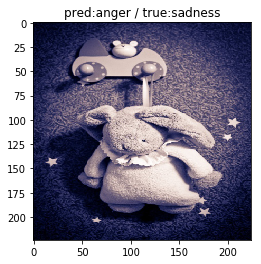

In [6]:
def plot_pic(num):
    img = X_test[num]
    true_label = iLABEL[Y_test[num]]
    result = model.predict(img.reshape(1,224,224,3))[0]
    pred_emotion = iLABEL[np.argmax(result)]
    plt.title("pred:{pred} / true:{true}".format(pred=pred_emotion,true=true_label))
    plt.imshow(img)
    res = sorted(result)[::-1]
    result = model.predict(img.reshape(1,224,224,3))[0]
    for i,label in enumerate(np.argsort(result)[::-1]):
        print(i+1,iLABEL[label],res[i])
    
plot_pic(10)

1 sadness 0.22247
2 anger 0.188619
3 surprise 0.165064
4 fear 0.15381
5 disgust 0.135071
6 joy 0.134893
7 neutral 7.35899e-05


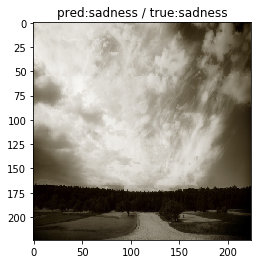

In [7]:
plot_pic(200)